In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('data/space_funding_v2.csv')
df.rename(columns = {'Amout MUSD': 'amount_usd'}, inplace = True)

In [14]:
df

,Company,Country,Sub Area,Major Category,Subcategory,Amount Orig. Currency,amount_usd,Stage,Lead Investor,Other Investor,Strategics,Month,News Link,Notes
0,Atmos Space Cargo,Germany,NaN,Space Infrastructure,ISAM,4M EUR,4.0,seed,HTGF,Seraphim SPace;E2MC;Ventis;Another.vc;APEX Fund,no,June,https://techcrunch.com/2023/06/23/atmos-space-...,"HTGF is serious, the guy formerly in the germa..."
1,Apex Spacecraft,US,CA,Spacecraft Manufacturing,System Integration,16M USD,16.0,Series A,"A16Z, Shield Capital",NaN,no,June,https://spacenews.com/apex-raises-16-million-f...,27M USD to date; still don't get it; currently...
2,Digantara,India,NaN,SSA,NaN,10M,10.0,Series A,Peak XV Partners (Ex-Sequoia India);,Kalaari Capital; Global Brain VC; Campus Fund,no,June,https://techcrunch.com/2023/06/20/digantara-fu...,"those guys are rather strugling, suprised the ..."
3,Tomorrow.io,US,MA,Weather,NaN,87M USD,87.0,Series E,Activate Capital,RTX Ventures; Seraphim; Chemonics; SquarePeg; ...,yes,June,https://www.tomorrow.io/blog/tomorrow-io-succe...,"R1,R2 satellites + improving traction, this lo..."
4,Orbit Fab,US,CO,Space Infrastructure,ISAM,28.5M USD,28.5,Series A,8090 Industries,Stride Capital; Industrious Ventures; Lockheed...,yes,April,https://spacenews.com/orbit-fab-raises-28-5-mi...,followup from supposedly small 8090 ticket; OF...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Arlula,Australia,NaN,EO,Downstream; Platform,2.2M AUD,1.5,Seed,Main Sequence,Black Nova Venture Capital,no,May,https://spaceanddefense.io/arlula-secures-2-2m...,"Interesting; EO downstream platform, kinda Orb..."
60,Look Up Space,France,NaN,SSA,debris monitoring,7M EUR,8.0,Seed,Karista; MIG Capital,Expansion,no,June,https://www.karista.vc/stories/look-up-space-r...,Other 7m in public money; obviously very attra...
61,Vyoma,Germany,NaN,SSA,debris monitoring,8.5M EUR,9.3,Seed,Safran Corporate Ventures,Happiness Capital; Atlantic Labs; Faber,yes,June,https://spacenews.com/vyoma-raises-9-million-f...,"int'g to see HK based firm there, that can be ..."
62,Venus Aerospace,US,TX,Spaceplanes,NaN,15.9M USD,15.9,Venture Round,Airbus Ventures,NaN,yes,June,https://www.prnewswire.com/news-releases/venus...,"not sure about the figure, but welp, here we g..."


In [15]:
month_dict = { "January" : 1,
       "February" : 2,
       "March" : 3,
       "April" : 4,
       "May" : 5,
       "June" : 6,
       "July" : 7,
       "August" : 8,
       "September" : 9,
       "October" : 10,
       "November" : 11,
       "December" : 12
}

df['Month'] = [f'2023/{month_dict[i]}/1' for i in df['Month']]

In [16]:
set(df['Month'])

{'2023/1/1', '2023/2/1', '2023/3/1', '2023/4/1', '2023/5/1', '2023/6/1'}

In [4]:
df['Country'] = df['Country'].replace('US','United States of America')
df['Country'] = df['Country'].replace('UK','United Kingdom')
df['Country'] = df['Country'].replace('Singapore','Malaysia')
df['Country'] = df['Country'].replace('Singapore; Malawi','Malaysia')

In [5]:
import geopandas as gpd
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\baker\AppData\Local\Temp\ipykernel_7764\2765374949.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


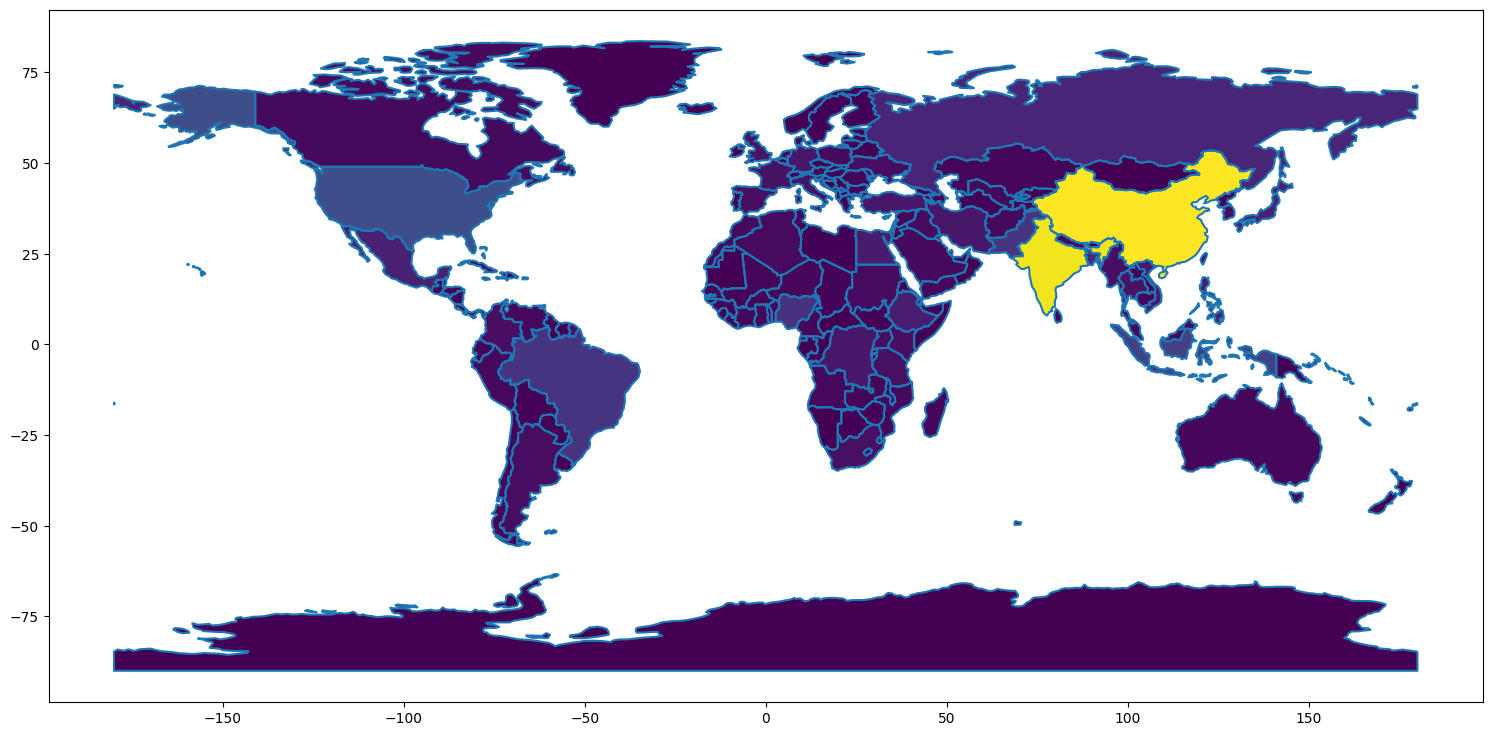

In [6]:
fig, world_ax = plt.subplots(1, 1)
df_world.plot(column = 'pop_est', ax = world_ax)
df_world.boundary.plot(ax=world_ax)
fig.set_size_inches(18.5, 10.5)

In [7]:
df_world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [8]:
amount_df = df.groupby('Country').sum()['amount_usd']
count_df = df.groupby('Country').count()
count_df.rename(columns = {'Company':'count'}, inplace = True)
count_df = count_df['count']
print(count_df)
company_df = df.groupby('Country').agg({'Company': lambda x: list(x), 'Lead Investor': lambda x: list(x), 'Other Investor': lambda x: list(x)})
company_df

Country
Australia                    3
Bulgaria                     1
Canada                       3
Denmark                      1
France                       2
Germany                      5
India                        4
Israel                       1
Japan                        4
Kenya                        1
Malaysia                     4
Switzerland                  1
United Kingdom               3
United States of America    31
Name: count, dtype: int64


,Company,Lead Investor,Other Investor
Country,,,
Australia,"[Quasar, Fleet Space Technologies, Arlula]","[Main Sequence Ventures, Blackbird, Main Seque...","[nan, Alumni Ventures; Hostplus; Grok Ventures..."
Bulgaria,[EnduroSat],[Ceecat Capital],[Freigest Capital]
Canada,"[Kepler Communications, NorthStar Earth & Spac...","[IA Ventures, Cartesian Capital Group, nan]","[Costanoa; Canaan; Tribe Capital; BDC Capital,..."
Denmark,[Quadsat],[IQ Capital],[Seraphim; Vækstfonden; ]
France,"[Exotrail, Look Up Space]","[Bpifrance, Karista; MIG Capital]",[Innovation Defense Fund; Eurazeo; 360 Capital...
Germany,"[Atmos Space Cargo, ISAR Aerospace, The Explor...","[HTGF, nan, EQT Ventures; Red River West, Find...",[Seraphim SPace;E2MC;Ventis;Another.vc;APEX Fu...
India,"[Digantara, Pixxel, Inspecity, SatSure]","[Peak XV Partners (Ex-Sequoia India); , Google...",[Kalaari Capital; Global Brain VC; Campus Fund...
Israel,[Ramon Space],[Ingrasys; Strategic Development Fund (Abu Dha...,[Grove Ventures; Deep insight; UMC Capital]
Japan,"[Astroscale, Interstellar Technologies, iQPS, ...","[nan, nan, Sky Perfect JSAT, nan]",[Development Bank of Japan; Mitsubishi Electri...


In [9]:
geo_set = df_world.merge(amount_df, left_on = 'name', right_index = True, how = 'left')
#geo_set = geo_set.merge(company_df, left_on = 'name', right_index = True, how = 'left')
geo_set = geo_set.merge(count_df, left_on = 'name', right_index = True, how = 'left')
geo_set = gpd.GeoDataFrame(geo_set)

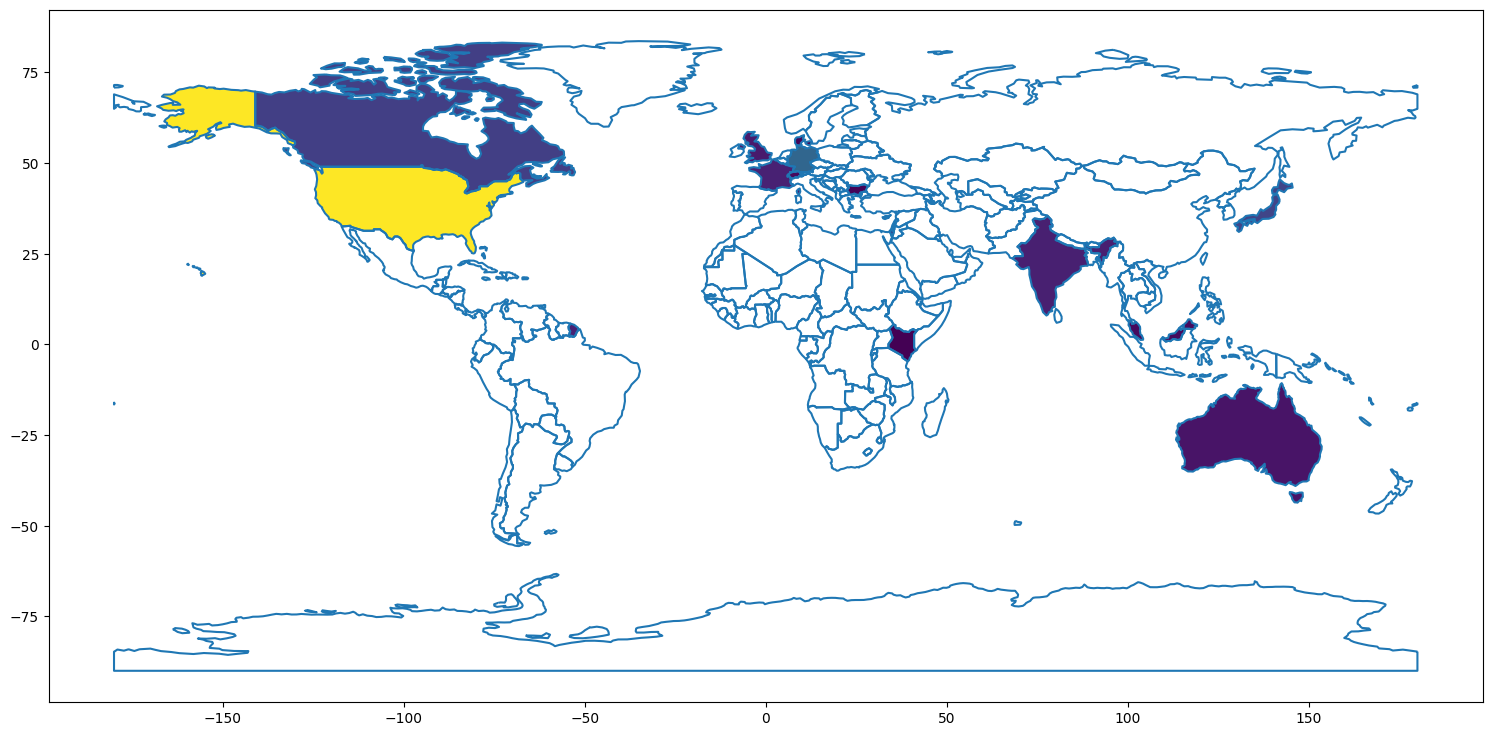

In [10]:
fig, world_ax = plt.subplots(1, 1)
geo_set.plot(column = 'amount_usd', ax = world_ax)
geo_set.boundary.plot(ax=world_ax)
fig.set_size_inches(18.5, 10.5)

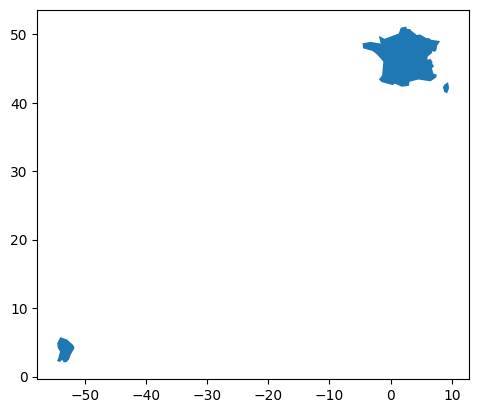

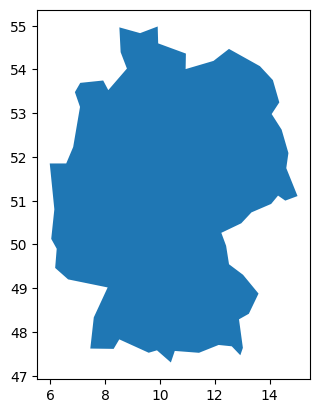

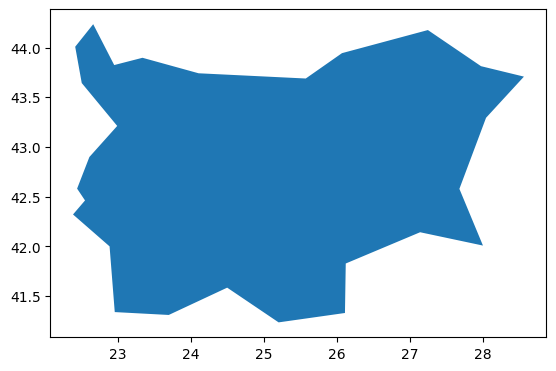

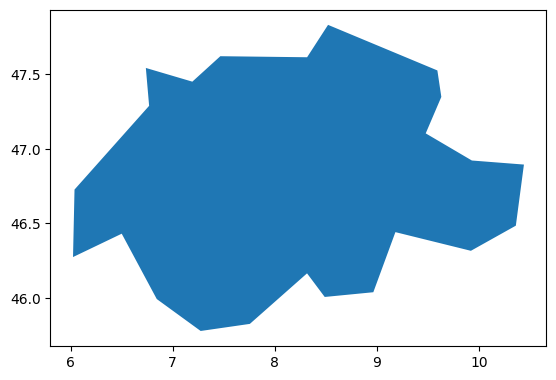

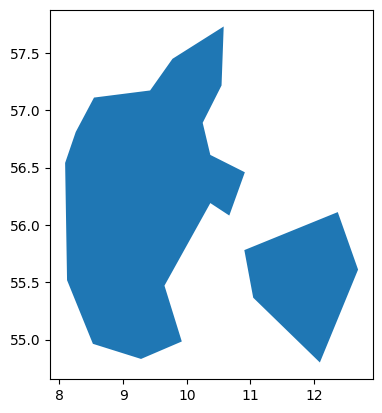

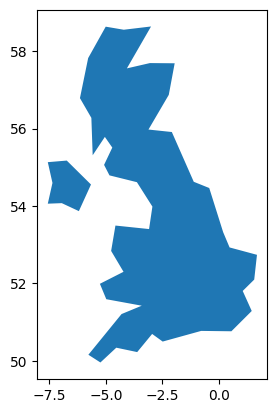

In [19]:
ff = geo_set[geo_set['continent'] == 'Europe'].dropna()
for i in ff['name']:
    ff[ff['name']==i].plot()

In [219]:
set(geo_set['name'])

{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herz.',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Denmark',
 'Djibouti',
 'Dominican Rep.',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eq. Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Is.',
 'Fiji',
 'Finland',
 'Fr. S. Antarctic Lands',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy

In [220]:
set(df['Country'])

{'Australia',
 'Bulgaria',
 'Canada',
 'Denmark',
 'France',
 'Germany',
 'India',
 'Israel',
 'Japan',
 'Kenya',
 'Malaysia',
 'Switzerland',
 'United Kingdom',
 'United States of America'}

In [221]:
df

,Company,Country,Sub Area,Major Category,Subcategory,Amount Orig. Currency,amount_usd,Stage,Lead Investor,Other Investor,Strategics,Month,News Link,Notes
0,Atmos Space Cargo,Germany,NaN,Space Infrastructure,ISAM,4M EUR,4.0,seed,HTGF,Seraphim SPace;E2MC;Ventis;Another.vc;APEX Fund,no,June,https://techcrunch.com/2023/06/23/atmos-space-...,"HTGF is serious, the guy formerly in the germa..."
1,Apex Spacecraft,United States of America,CA,Spacecraft Manufacturing,System Integration,16M USD,16.0,Series A,"A16Z, Shield Capital",NaN,no,June,https://spacenews.com/apex-raises-16-million-f...,27M USD to date; still don't get it; currently...
2,Digantara,India,NaN,SSA,NaN,10M,10.0,Series A,Peak XV Partners (Ex-Sequoia India);,Kalaari Capital; Global Brain VC; Campus Fund,no,June,https://techcrunch.com/2023/06/20/digantara-fu...,"those guys are rather strugling, suprised the ..."
3,Tomorrow.io,United States of America,MA,Weather,NaN,87M USD,87.0,Series E,Activate Capital,RTX Ventures; Seraphim; Chemonics; SquarePeg; ...,yes,June,https://www.tomorrow.io/blog/tomorrow-io-succe...,"R1,R2 satellites + improving traction, this lo..."
4,Orbit Fab,United States of America,CO,Space Infrastructure,ISAM,28.5M USD,28.5,Series A,8090 Industries,Stride Capital; Industrious Ventures; Lockheed...,yes,April,https://spacenews.com/orbit-fab-raises-28-5-mi...,followup from supposedly small 8090 ticket; OF...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Arlula,Australia,NaN,EO,Downstream; Platform,2.2M AUD,1.5,Seed,Main Sequence,Black Nova Venture Capital,no,May,https://spaceanddefense.io/arlula-secures-2-2m...,"Interesting; EO downstream platform, kinda Orb..."
60,Look Up Space,France,NaN,SSA,debris monitoring,7M EUR,8.0,Seed,Karista; MIG Capital,Expansion,no,June,https://www.karista.vc/stories/look-up-space-r...,Other 7m in public money; obviously very attra...
61,Vyoma,Germany,NaN,SSA,debris monitoring,8.5M EUR,9.3,Seed,Safran Corporate Ventures,Happiness Capital; Atlantic Labs; Faber,yes,June,https://spacenews.com/vyoma-raises-9-million-f...,"int'g to see HK based firm there, that can be ..."
62,Venus Aerospace,United States of America,TX,Spaceplanes,NaN,15.9M USD,15.9,Venture Round,Airbus Ventures,NaN,yes,June,https://www.prnewswire.com/news-releases/venus...,"not sure about the figure, but welp, here we g..."


In [222]:
df.to_csv('data/preprocessed_funding.csv')

In [223]:
geo_set.to_file('data/edited_geo_df.shp')

In [224]:
gpd.read_file("data/edited_geo_df.shp")

,pop_est,continent,name,iso_a3,gdp_md_est,amount_usd,count,geometry
0,889953.0,Oceania,Fiji,FJI,5496,NaN,NaN,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,NaN,NaN,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,NaN,NaN,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,128.10,3.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,685.55,31.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,NaN,NaN,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,NaN,NaN,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,NaN,NaN,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,NaN,NaN,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
